<a href="https://colab.research.google.com/github/wertrew21/programming-practice/blob/DLfS/Deep_learning_from_Scratch_S1_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.6 matplotlib

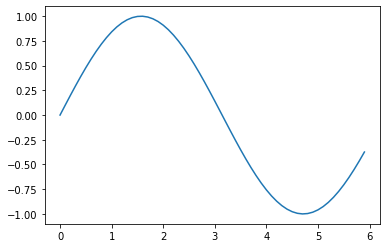

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### 데이터 준비
x = np.arange(0, 6, 0.1)
y = np.sin(x)

### 그래프 그리기
plt.plot(x, y) # x와 y의 관계 형성
plt.show() # 그래프 표시

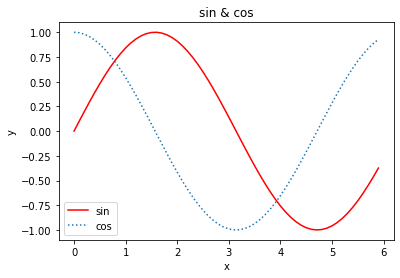

In [ ]:
### 데이터 준비
x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

### 그래프 그리기
plt.plot(x, y1, label = "sin", color ='r') # x-y1 그래프 생성
plt.plot(x, y2, linestyle = ":", label = "cos") # x-y2 그래프 생성
plt.xlabel("x") # x축 이름
plt.ylabel("y") # y축 이름
plt.title("sin & cos") # 제목
plt.legend() # 범례
plt.show() # 그래프 표시

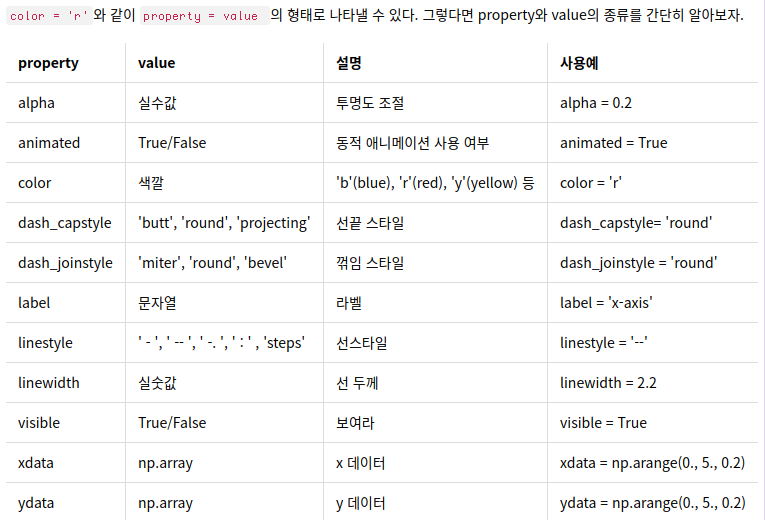

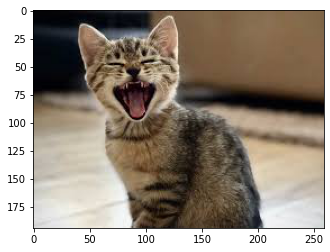

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('/content/drive/MyDrive/coding/DLfS/cat.jpeg') # 이미지 읽어오기

plt.imshow(img)
plt.show()

# 2. 퍼셉트론

In [ ]:
def AND(x1, x2): # AND 논리회로를 구현한 함수
    w1, w2, theta = 0.5, 0.5, 0.7
    tmp = x1*w1 + x2*w2
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

print(AND(0, 0), AND(1, 0), AND(0, 1), AND(1, 1), sep = '\n')

0
0
0
1


# 3. 신경망

## 3.2  활성화 함수 Activation function

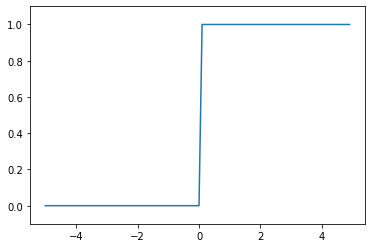

In [ ]:
# 계단함수
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1 , 1.1)
plt.show()


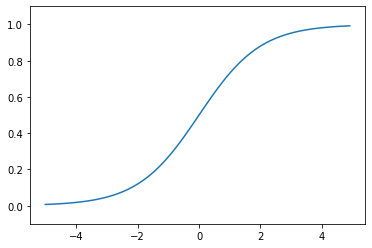

In [ ]:
# 시그모이드 함수 sigmoid

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

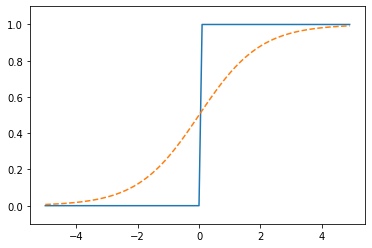

In [ ]:
# 시그모이드와 계단함수의 비교
import numpy as np
import matplotlib.pylab as plt


def step_function(x):
    return np.array(x > 0, dtype = np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = step_function(x)
y2 = sigmoid(x)

plt.plot(x, y1)
plt.plot(x, y2, linestyle = '--')
plt.ylim(-0.1, 1.1)
plt.show()

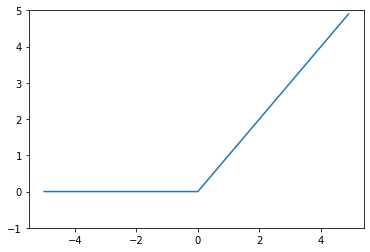

In [ ]:
# ReLU 함수 Rectified Linear Unit
import matplotlib.pylab as plt
import numpy as np

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.0)
plt.show()

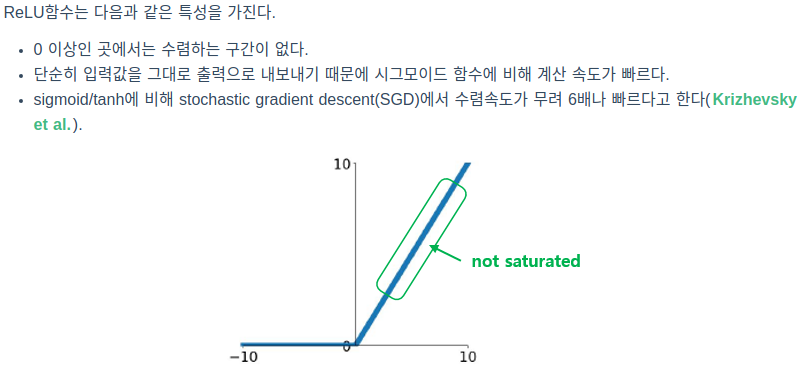

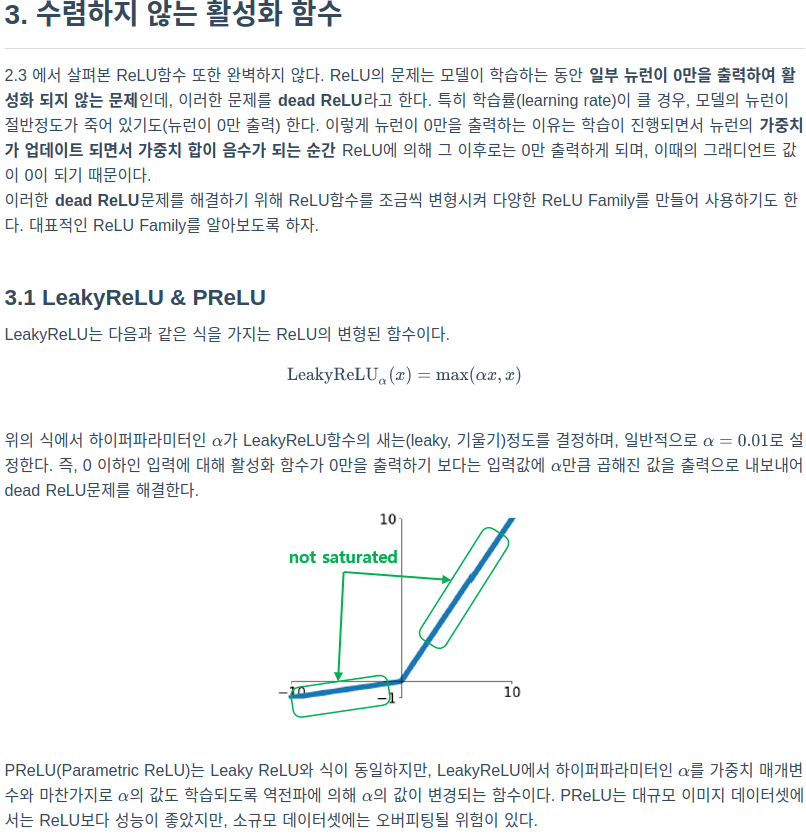

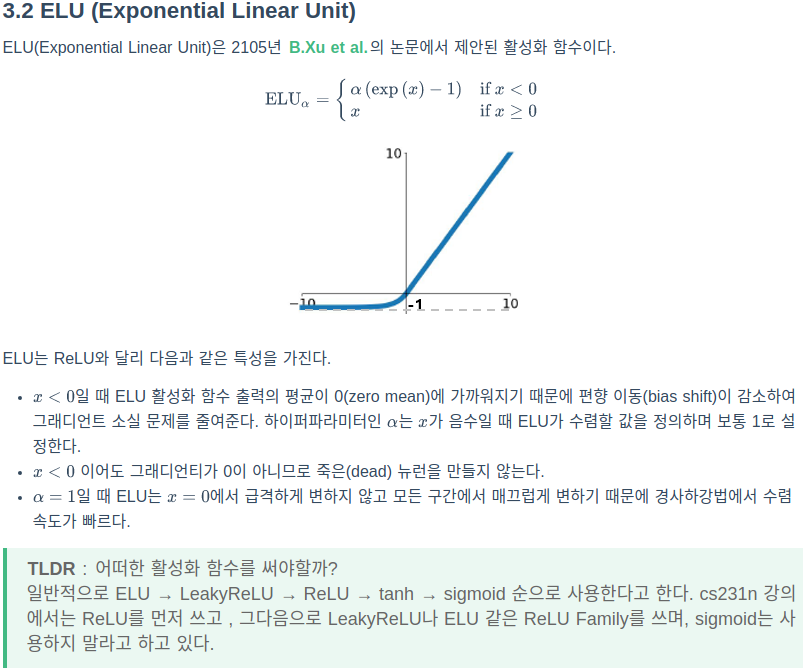

## 3.4 3층 신경망 구현하기

In [ ]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def identity_function(x):
    return x

# 1X2 2X3 = 1X3
# input layer(0th) ~ 1st hidden layer
X = np.array([1.0, .5])
W1 = np.array([[.1, .3, .5],[.2, .4, .6]])
B1 = np.array([.1, .2, .3])

print("shape of X, W1, B1")
print(X.shape)
print(W1.shape)
print(B1.shape)
print()

A1 = np.dot(X, W1) + B1
Z1 = sigmoid(A1)

# 1X3 3X2 = 1X2
# 1st hidden layer ~ 2nd hidden layer
W2 = np.array([[.1, .4],[.2, .5], [.3, .6]])
B2 = np.array([.1, .2])

print("shape of Z1, W2, B2")
print(Z1.shape)
print(W2.shape)
print(B2.shape)
print()

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

# 1X2 2X2 = 1X2
# 2st hidden layer ~ output layer(3th)
W3 = np.array([[.1, .3],[.2, .4]])
B3 = np.array([.1, .2])

A3 = np.dot(Z2, W3) + B3
Z3 = identity_function(A3) # or Y = A3

In [ ]:
# Same as above but more organised and normalised code.
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def identity_function(x):
    return x

def init_network(): # bias and weight
    network = {} # dictionary data type
    network['W1'] = np.array([[.1, .3, .5],[.2, .4, .6]])
    network['b1'] = np.array([.1, .2, .3])
    network['W2'] = np.array([[.1, .4], [.2, .5], [.3, .6]])
    network['b2'] = np.array([.1, .2])
    network['W3'] = np.array([[.1, .3], [.2, .4]])
    network['b3'] = np.array([.1, .2])

    return network

def forward(network, x): # load network parameters and get y from x
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b2
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, .5])
y = forward(network, x)
print('input x =', x)
print()
print('network =', network, sep = '\n')
print()
print('output y =', y)

input x = [1.  0.5]

network =
{'W1': array([[0.1, 0.3, 0.5],
       [0.2, 0.4, 0.6]]), 'b1': array([0.1, 0.2, 0.3]), 'W2': array([[0.1, 0.4],
       [0.2, 0.5],
       [0.3, 0.6]]), 'b2': array([0.1, 0.2]), 'W3': array([[0.1, 0.3],
       [0.2, 0.4]]), 'b3': array([0.1, 0.2])}

output y = [0.31682708 0.69627909]


## 3.5 출력층 설계하기

In [ ]:
# 3.5.1  소프트맥스 함수
# 소프트맥스 함수는 분류classification 문제의 출력층에서 사용.

import numpy as np

def softmax(a):
    exp_a = np.exp(a)     #!!! dtype = array
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

In [ ]:
# 3.5.2  개선한 소프트맥스 함수

def improved_softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)      # overflow prevention
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a

    return y

#  it is derived from the equation below
#  exp(x) / sum(exp(x)) = C*exp(x) / C*sum(exp(x))
#                       = exp(x + C') / sum(exp(x + C'))

In [ ]:
a = np.array([.3, 2.9, 4.])
y = improved_softmax(a)
print(y) # y = [0.01821127 0.24519181 0.73659691]
print(np.sum(y)) # np.sum(y) = 1.0

# which means, the output from Softmax function could be interpreted as a kind of odd
# since 0 <= y <= 1 and sum(y) = 1

[0.01821127 0.24519181 0.73659691]
1.0


## 3.6  손글씨 숫자 인식
추론 과정: 순전파(forward propagation)

In [ ]:
import sys, os
os.chdir('/content/drive/MyDrive/coding/DLfS/ch03') # 디렉터리 변경
os.getcwd() # 현재 디렉터리 표시
sys.path.append(os.pardir) # 부모 디렉터리 추가
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \ # (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블)
    load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
import sys, os
os.chdir('/content/drive/MyDrive/coding/DLfS/ch03')
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image # Python Image Library

#def img_show(img):
#    pil_img = Image.fromarray(np.uint8(img))
#    pil_img

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

#img_show(img)
# the code below allows showing image in colab
pil_img = Image.fromarray(np.uint8(img))
pil_img

5
(784,)
(28, 28)


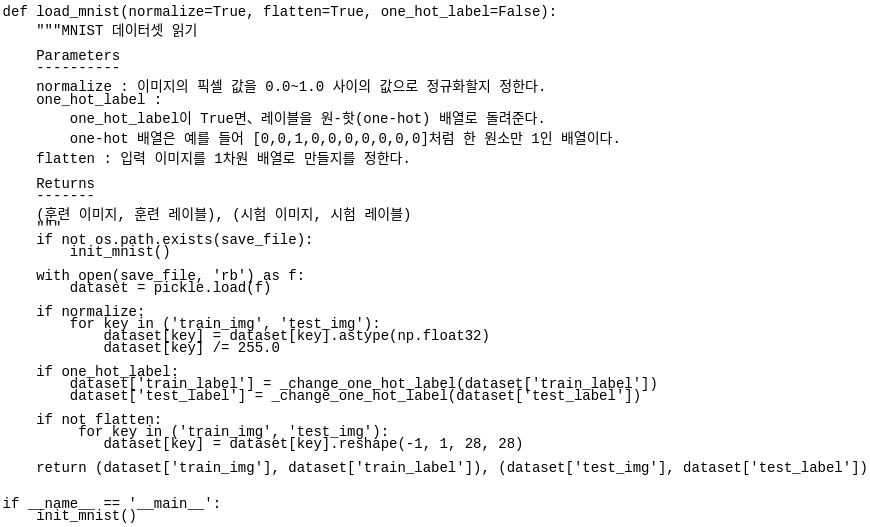

### 3.6.2 신경망의 추론 처리

In [ ]:
import sys, os
os.chdir('/content/drive/MyDrive/coding/DLfS/ch03')
sys.path.append(os.pardir)
import numpy as np
import pickle # must be included to enable pickle function.
import time # to measure time to calculate. could be omitted.
from dataset.mnist import load_mnist

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network

def predict(network, x): # predicts label when network and image(= x) are input
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1 # 764(28*28) parameters(image) are input.
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3) # 10(0~9) parameters(label) are output.

    return y

x, t = get_data()
network = init_network()

accuracy_cnt = 0

start = time.time()
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # gets the index of the argument which has highest odd
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print(time.time() - start)

Accuracy:0.9352
0.549997091293335


In [ ]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0
start = time.time()
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # about axis, refer to the code below
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
print(time.time() - start)

Accuracy:0.0027
0.07905721664428711


In [ ]:
# the difference between np.argmax(a) and with axis=1
a = np.array([[1, 2, 3], [4, 5, 6]])
print(np.argmax(a))
print(np.argmax(a, axis=1))

5
[2 2]


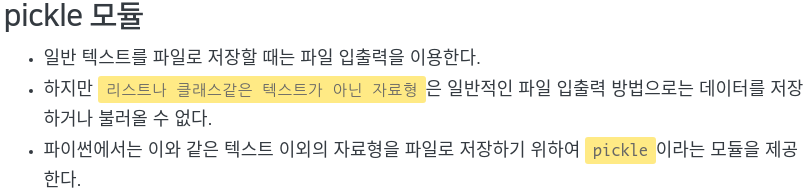

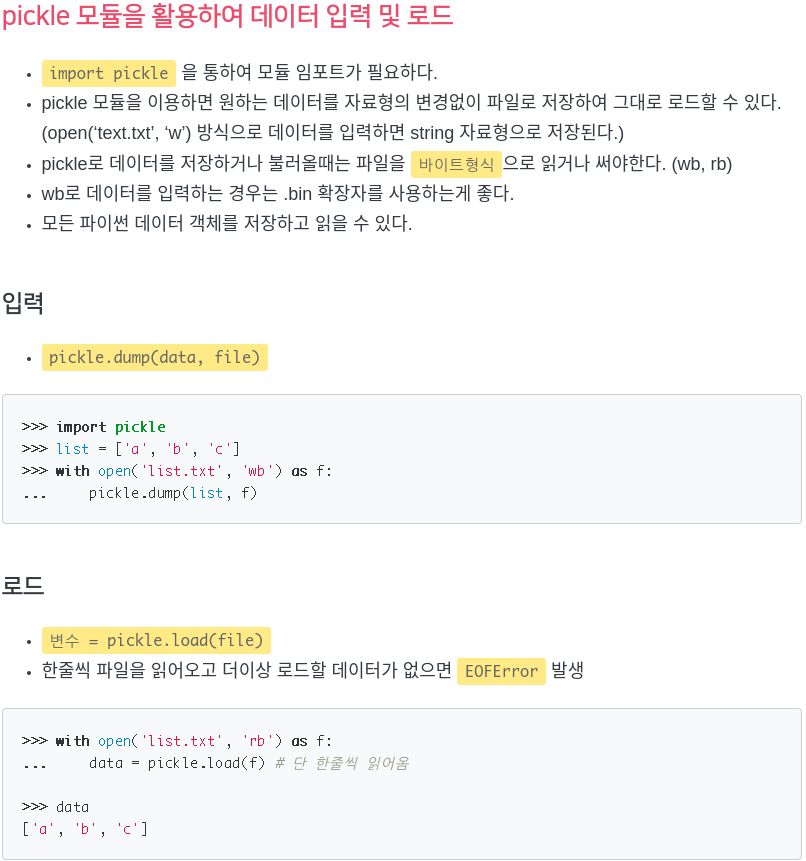

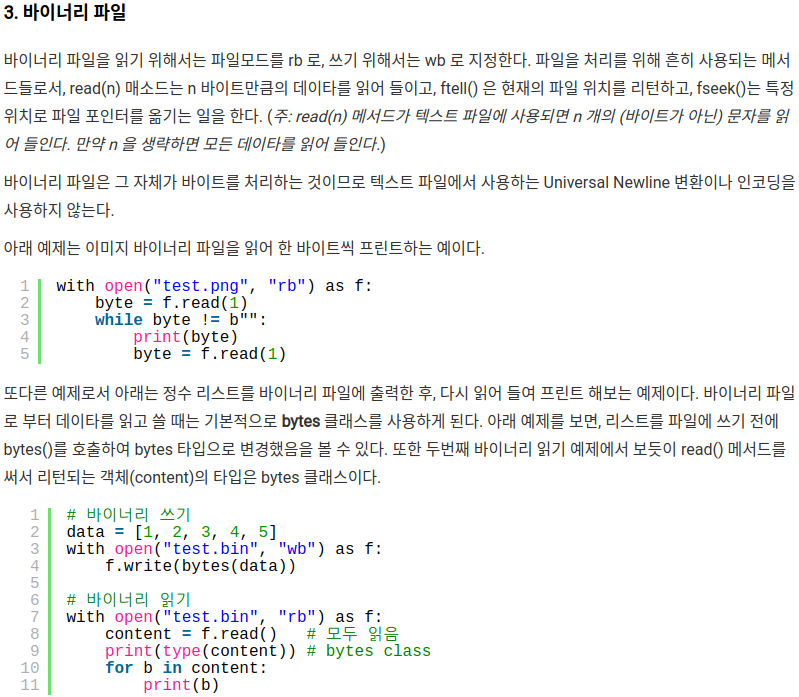